In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import sympy as sy
np.set_printoptions(precision=4)

In [2]:
#%matplotlib inline
def pltAttr(x='', y='', title=None, legend='best', save=None):
    plt.tight_layout()
    if legend is not None:
        plt.legend(loc=legend)
    plt.xlabel(x)
    plt.ylabel(y)
    if title is not None:
        plt.title(title)
    if save is not None:
        plt.savefig(save)

In [91]:
# global variables
g = 9.81
min_u = -1
max_u = 1
lambda_ = 0

#surface
x = sy.symbols('x') 
f = -sy.cos(x/2)

fp = sy.diff(f)
norm = 1 / sy.sqrt(1+fp**2)
normp = sy.diff(norm)
fp_norm = fp* norm
fp_normp = sy.diff(fp_norm)

f_lam = sy.lambdify(x, f)
fp_lam = sy.lambdify(x, fp)
normp_lam = sy.lambdify(x, normp)
fp_normp_lam = sy.lambdify(x, fp_normp)

In [92]:
t_f = 10
x0 = -10
v0 = 0

In [93]:
# define state equations
def ode(y,t):
    x = y[0]
    v = y[1]
    p1 = y[2]
    p2 = y[3]
    
    #calculate various things
    fp_x = fp_lam(x)
    normp_x = normp_lam(x)
    fp_normp_x = fp_normp_lam(x)
    u = min(max(min_u, p2 / (2*(1-lambda_))), max_u)
#     u = p2 / (2*(1-lambda_))

    #find vdot and pdot
    xdot = v / np.sqrt(1 + fp_x**2)
    vdot = u - g*fp_x / np.sqrt(1 + fp_x**2)
    pd1 = -p1*v*normp_x + p2*g*fp_normp_x
    pd2 = -p1/np.sqrt(1+fp_x**2)
    
    return np.array([xdot, vdot, pd1, pd2])

In [94]:
def find_t(f,a,b,alpha,beta,t0,Df,maxI):
    sol1 = np.inf
    i = 0
    while np.linalg.norm(sol1-beta) > 10**-8 and i < maxI:
        #compute solution
        sol0 = odeint(f, np.concatenate((alpha,t0)), [a,b], atol=1e-10)[1,0:2]

        #update guess
        t1 = t0 - np.linalg.inv(Df)@sol0
        
        #update derivative
        sol1 = odeint(f, np.concatenate((alpha,t1)), [a,b], atol=1e-10)[1,0:2]
        s = t1-t0
        y = sol1-sol0
        Df = Df + np.outer(y-Df@s, s) / s@s
        
        #update values
        print(sol0, t0)
        t0 = t1
        i = i+1
        
    if i == maxI:
        print("t not found")
    return t1

def solveSecant(f,X,a,b,alpha,beta,t0,Df,maxI):
    t = find_t(f,a,b,alpha,beta,t0,Df,maxI)
    sol = odeint(f, np.concatenate((alpha,t)), X, atol=1e-10)
    return sol

a = 0
b = t_f
alpha = np.array([x0, v0])
beta = np.zeros(2)

X = np.linspace(a, b, 1000)
sol = solveSecant(ode, X, a, b, alpha, beta, np.array([0.28,1.4]), np.array([[1,0],[0,-1]])*-100, 40)

[-11.5574   0.5533] [0.28 1.4 ]
[-11.5552   0.5906] [0.1644 1.3945]
[-11.5504   0.6337] [0.0472 1.3902]
[-11.5427   0.6823] [-0.0716  1.3872]
[-11.5327   0.7324] [-0.1921  1.3854]
[-11.5211   0.7813] [-0.3143  1.385 ]
[-11.5077   0.8308] [-0.4382  1.3859]
[-11.4924   0.8814] [-0.5639  1.3882]
[-11.4754   0.9332] [-0.6914  1.392 ]
[-11.4568   0.9863] [-0.8208  1.3973]
[-11.4368   1.0407] [-0.9522  1.4042]
[-11.4155   1.0966] [-1.0854  1.4127]
[-11.3931   1.1541] [-1.2208  1.4229]
[-11.3724   1.2077] [-1.3582  1.4348]


/home/contagon/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


[-11.6958   1.5898] [-1.4978  1.4487]
[-11.9821   1.7615] [-1.644  1.462]
[-11.4694   1.5009] [-1.797   1.4776]
[-11.5933   1.6532] [-1.9466  1.4974]
[-12.6583   1.7222] [-2.1009  1.5193]
[-11.8307   1.8611] [-2.2734  1.548 ]
[-12.8169   1.658 ] [-2.4387  1.5764]
[-12.8668   1.64  ] [-2.6226  1.6156]
[-12.073    2.0016] [-2.8127  1.6606]
[-12.0361   2.0179] [-2.996   1.7031]
[-11.2554   1.5389] [-3.1839  1.7505]
[-11.251    1.5544] [-3.3647  1.8034]
[-11.2468   1.5684] [-3.5501  1.8607]
[-11.512    1.8486] [-3.7404  1.9229]
[-11.2391   1.5921] [-3.9406  1.9894]
[-11.2356   1.602 ] [-4.142   2.0625]
[-11.3816   1.7737] [-4.3493  2.1415]
[-11.2297   1.6197] [-4.5658  2.2264]
[-11.8037   2.0703] [-4.7865  2.3186]
[-11.2249   1.6348] [-5.0263  2.4196]
[-11.2231   1.6415] [-5.2633  2.528 ]
[-11.2214   1.6476] [-5.5088  2.6449]
[-11.3442   1.7898] [-5.7636  2.771 ]
[-11.2189   1.6586] [-6.0314  2.9074]
[-11.4818   1.9227] [-6.3076  3.0549]
[-11.5142   1.952 ] [-6.6026  3.2158]
t not found


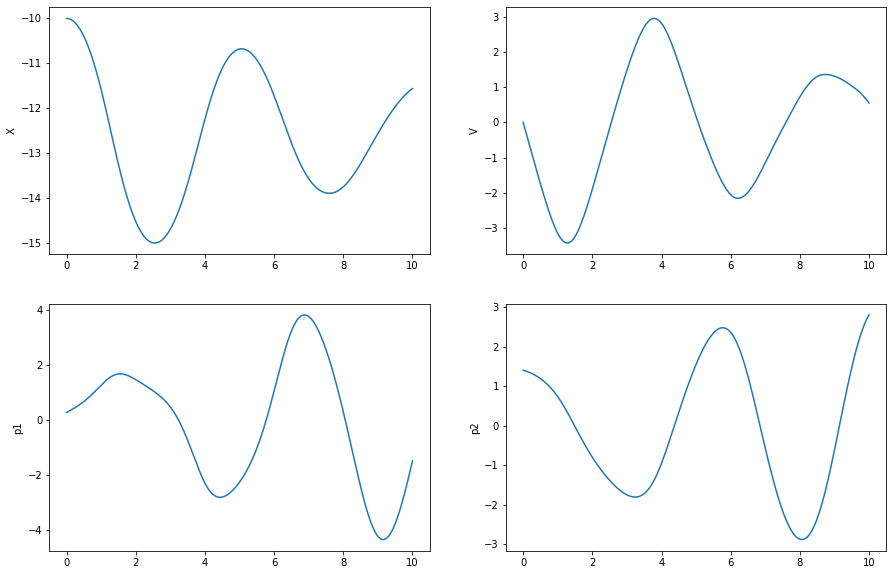

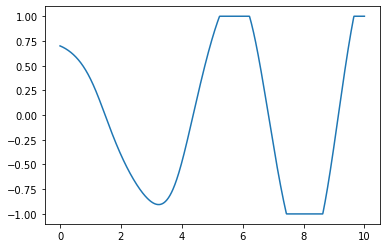

In [95]:
sol = odeint(ode, np.array([x0, v0, 0.28, 1.4]), X, atol=1e-10)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
t = X.copy()
ax[0, 0].plot(t, sol[:,0])
ax[0, 0].set_ylabel('X')
ax[0, 1].plot(t, sol[:,1])
ax[0, 1].set_ylabel('V')
ax[1, 0].plot(t, sol[:,2])
ax[1, 0].set_ylabel('p1')
ax[1, 1].plot(t, sol[:,3])
ax[1, 1].set_ylabel('p2')
plt.show()

ones = np.ones_like(sol[:,3])
plt.plot(t, np.minimum(np.maximum(ones*min_u, sol[:,3] / (2*(1-lambda_))), ones*max_u))